## Examine Basic Metric (depth, nvisits, etc.) Results in DDFs (All OpSims)
**Author(s):** Weixiang Yu & Gordon Richards
<br>**Last updated:** 04-12-21
<br>**Short description:**
This notebook shows the results of a few basic metrics (single epoch depth, max airmass and nvisits) evaluated in the DDFs, as to understand the complexity/diversity of DDFs.

### 0. Software Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import glob
import os, sys

mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/configs/master/viz/yuBasic.rc')
%matplotlib inline

In [2]:
# automatically extract username
your_username = os.getcwd().split('/')[5]
print(f'Your automatically extracted username is: {your_username}.'
        '\nIf it is incorrect, please mannually reset it.')

Your automatically extracted username is: ywx649999311.
If it is incorrect, please mannually reset it.


##### Import the sims_maf modules needed.

In [3]:
# import lsst.sim.maf moduels modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
from lsst.sims.maf.stackers import BaseStacker
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# add path
sys.path.insert(0, '../src/')
sys.path.insert(0, '../data/run_info//')

# import convenience functions
from opsimUtils import *

### 1. Read data from disk

In [4]:
 # do NOT put your username here, put it in the cell at the top of the notebook.
if your_username == '':
    raise Exception('Please provide your username!  See the top of the notebook.')

resultDbPath = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/'+\
                'wy/Basics/AllDDF_n128_ugrizy_041321///ResultDBs/'
metricDataPath = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/'+\
                'wy/Basics/AllDDF_n128_ugrizy_041321///MetricData/'

In [5]:
# take Lynne's notes on families
import run_infos as ri

# gather family info, but remove version_baselines
families = ri.FamilyInfo()
fam_db = {key:value for (key, value) in families.family.items() if key != 'version_baselines'}
family_ls = list(fam_db.keys())
comp_runs = {key:value for (key, value) in families.family_baseline.items() if key != 'version_baselines'}

# read in the list of relevant runs
with open('../data/run_info/runs_list.txt', 'r') as runs_file:
    runs_list = runs_file.read().split('\n')

#### Import only DDF relevant runs

In [6]:
## make ddf list
# get ddf specific runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

# add baseline
ddf_runs = ddf_runs + ['baseline_v1.5_10yrs', 'baseline_nexp2_v1.7_10yrs', 'baseline_nexp1_v1.6_10yrs']

In [7]:
# import metric evaluations
bundleDicts = {}

resultDbsView = getResultsDbs(resultDbPath)
for runName in ddf_runs:
    bundleDicts[runName] = bundleDictFromDisk(resultDbsView[runName], runName, metricDataPath)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

In [10]:
# select metric results for the relevant opsims
final_bundleDicts = {key:value for (key, value) in bundleDicts.items() if key in ddf_runs}
final_resultDbs = {key:value for (key, value) in resultDbsView.items() if key in ddf_runs}

In [11]:
# check keys
# dbRuns = list(resultDbsView.keys())
bd_keys = list(bundleDicts[ddf_runs[0]].keys())
print(bd_keys)

[(1, 'm5p25_u_COSMOS'), (2, 'm5Median_u_COSMOS'), (3, 'airmassMax_u_COSMOS'), (4, 'nvisit_u_COSMOS'), (5, 'coadd_u_COSMOS'), (6, 'm5p25_g_XMM-LSS'), (7, 'm5Median_g_XMM-LSS'), (8, 'airmassMax_g_XMM-LSS'), (9, 'nvisit_g_XMM-LSS'), (10, 'coadd_g_XMM-LSS'), (11, 'm5p25_z_COSMOS'), (12, 'm5Median_z_COSMOS'), (13, 'airmassMax_z_COSMOS'), (14, 'nvisit_z_COSMOS'), (15, 'coadd_z_COSMOS'), (16, 'm5p25_z_XMM-LSS'), (17, 'm5Median_z_XMM-LSS'), (18, 'airmassMax_z_XMM-LSS'), (19, 'nvisit_z_XMM-LSS'), (20, 'coadd_z_XMM-LSS'), (21, 'm5p25_i_ECDFS'), (22, 'm5Median_i_ECDFS'), (23, 'airmassMax_i_ECDFS'), (24, 'nvisit_i_ECDFS'), (25, 'coadd_i_ECDFS'), (26, 'm5p25_r_XMM-LSS'), (27, 'm5Median_r_XMM-LSS'), (28, 'airmassMax_r_XMM-LSS'), (29, 'nvisit_r_XMM-LSS'), (30, 'coadd_r_XMM-LSS'), (31, 'm5p25_r_COSMOS'), (32, 'm5Median_r_COSMOS'), (33, 'airmassMax_r_COSMOS'), (34, 'nvisit_r_COSMOS'), (35, 'coadd_r_COSMOS'), (36, 'm5p25_r_EDFS'), (37, 'm5Median_r_EDFS'), (38, 'airmassMax_r_EDFS'), (39, 'nvisit_r_EDFS')

### 2. Make plots (best 10, worst 10 and all other ddfs)
- [median single-epoch depth](#m5median)
- [maximum airmass](#maxairmass)
- [total number of visits](#nvisit)
- [coadd depth](#coadd)

In [12]:
from radar_plot import *
from matplotlib.colors import ListedColormap

In [13]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)

    return ListedColormap(color_list, name=cmap_name)

In [14]:
def radar(df, rgrids=[0.7, 1.0, 1.3, 1.6], cmap=None, dpi=100,
          alpha=0.1, legend=True, figsize=(8.5, 5), fill=False,
          bbox_to_anchor=(1.6, 0.5)):
    """
    make a radar plot!
    """
    theta = radar_factory(np.size(df.columns), frame='polygon')
    fig, axes = plt.subplots(figsize=figsize, subplot_kw=dict(projection='radar'),
                            dpi=dpi)
    axes.set_rgrids(rgrids)

    ix = 0
    my_cmap = discrete_cmap(len(df), cmap)
    for i, row in df.iterrows():
        axes.plot(theta, row.values, 'o-', label=i, color=my_cmap(ix), 
                  markersize=4, zorder=0)
        if fill:
            axes.fill(theta, row.values, alpha=alpha)
        ix += 1

    variables = df.columns.values

    axes.set_varlabels(variables)
    if legend:
        axes.legend(bbox_to_anchor=bbox_to_anchor, borderaxespad=0, 
                    loc='lower right', fontsize=10)
    axes.set_ylim([np.min(rgrids), np.max(rgrids)])

    return fig, axes

In [15]:
def getNormSummaryMedian(resultDbs, norm_run, KeyNames, filters, norm_func=np.divide):
    """Retrieve summary statistics for all selected metrics.
    
    Args:
        resultDbs (dict): Dictionary of resultdbs.
        norm_run (str): Run name for the normalization opsim.
        KeyNames (list): Names for the metrics
        filters (list): Filters.
        norm_func (object, optional): Normalizing function, one of np.divide and 
            np.subtract. Defaults to np.divide.
    
    """
    
    # get summary names
    summaryNames = getSummaryStatNames(resultDbs[norm_run], 
                                       KeyNames[0])[0]['StatNames']

    # loop through metric Keys and summaries -> combine into one pandas df
    summary_dfs = []
    for KeyName in KeyNames:
        for summaryName in ['Median']:
            summary_df = getSummary(
                resultDbs, 
                KeyName, 
                summaryName)[['summaryValue', 'runName']].rename(columns={'summaryValue':
                                                                f'{KeyName}_{summaryName}'})
            summary_dfs.append(summary_df.set_index('runName'))

    summary_df_all = summary_dfs[0].join(summary_dfs[1:], 
                                         how='outer').reset_index().rename(columns={'index': 'runName'})
    summary_df_all = summary_df_all.set_index('runName')
    
    # loop through filt and normalize
    KeyName_root = KeyNames[0].split('_')[0]
    returned_cols = [col for col in summary_df_all.columns for filt in filters if f'_{filt}' in col]
    summary_df_normed = summary_df_all.copy().loc[:, returned_cols]
    
    for filt in filters:
        # norm by norm metric
        norm_metric = summary_df_all.loc[norm_run, f'{KeyName_root}_{filt}_XMM-LSS_Median']
        filt_cols = [col for col in summary_df_all.columns if f'_{filt}_' in col]
        summary_df_normed.loc[:, filt_cols] = norm_func(summary_df_normed.loc[:, filt_cols], norm_metric)
        
        # fillna
        summary_df_normed = summary_df_normed.fillna(0)
        
        # compute sum
        summary_df_normed.loc[:, f'{filt}_sum'] = summary_df_normed.loc[:, filt_cols].sum(axis=1)
    
    return summary_df_normed

<a id='m5median'><a>
#### 2.1 Median Single-epoch Depth
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [17]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'm5Median' in key[1]]
KeyNames

['m5Median_u_COSMOS',
 'm5Median_g_XMM-LSS',
 'm5Median_z_COSMOS',
 'm5Median_z_XMM-LSS',
 'm5Median_i_ECDFS',
 'm5Median_r_XMM-LSS',
 'm5Median_r_COSMOS',
 'm5Median_r_EDFS',
 'm5Median_r_ELAISS1',
 'm5Median_g_EDFS',
 'm5Median_z_EDFS',
 'm5Median_u_ELAISS1',
 'm5Median_u_XMM-LSS',
 'm5Median_u_ECDFS',
 'm5Median_g_ELAISS1',
 'm5Median_y_XMM-LSS',
 'm5Median_g_COSMOS',
 'm5Median_z_ELAISS1',
 'm5Median_g_ECDFS',
 'm5Median_z_ECDFS',
 'm5Median_i_COSMOS',
 'm5Median_y_ELAISS1',
 'm5Median_y_EDFS',
 'm5Median_r_ECDFS',
 'm5Median_i_ELAISS1',
 'm5Median_y_COSMOS',
 'm5Median_y_ECDFS',
 'm5Median_i_EDFS',
 'm5Median_i_XMM-LSS',
 'm5Median_u_EDFS']

In [18]:
# get summary for the above keynames and normalize by the specified run
norm_run = 'baseline_v1.5_10yrs'
summary_df_normed_m5median = getNormSummaryMedian(final_resultDbs, norm_run, 
                                                  KeyNames, ['u', 'g'], norm_func=np.subtract)

# get ddf specific runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

# compile filter cols
filt_cols = {}
for filt in 'ugrizy':
    filt_cols[filt] = [col for col in summary_df_normed_m5median.columns if f'_{filt}_' in col]

#### 2.1.1 `u` band

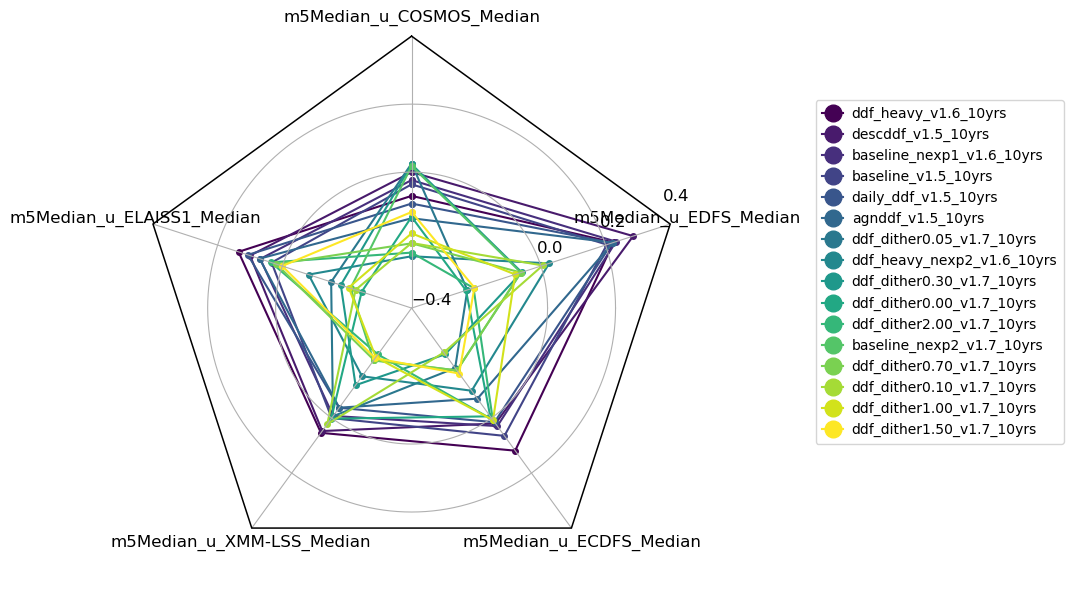

In [19]:
# get best, worst 10
summary_df_normed_u = summary_df_normed_m5median.sort_values(
    'u_sum', ascending=False).loc[:, filt_cols['u'] + ['u_sum']]

# best_worst_u = pd.concat([summary_df_normed_u.iloc[:10], summary_df_normed_u.iloc[-10:]])
# # add other ddfs
# u_ddf_runs = np.unique(list(best_worst_u.index) + ddf_runs)

# make radar plots
radar(summary_df_normed_u.sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.4, 0, 0.2, 0.4], cmap='viridis', alpha=0.8)
# _ = plt.title(' Median single-epoch depth (normalized to baseline_v1.5_10yrs)', fontsize=12)
plt.tight_layout()

#### 2.1.2 `g` band

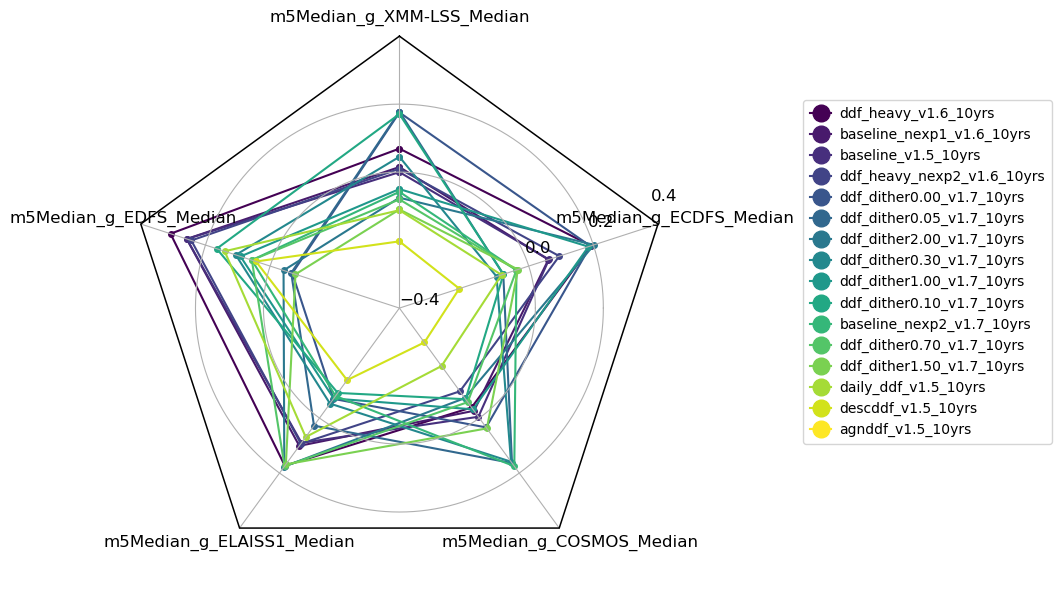

In [20]:
# get best, worst 10
summary_df_normed_g = summary_df_normed_m5median.sort_values(
    'g_sum', ascending=False).loc[:, filt_cols['g'] + ['g_sum']]

# make radar plots
radar(summary_df_normed_g.sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.4, 0, 0.2, 0.4], cmap='viridis', 
      alpha=0.6)
plt.tight_layout()

<a id='maxairmass'><a>
#### 2.2 Maximum airmass
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [21]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'airmassMax' in key[1]]
KeyNames

['airmassMax_u_COSMOS',
 'airmassMax_g_XMM-LSS',
 'airmassMax_z_COSMOS',
 'airmassMax_z_XMM-LSS',
 'airmassMax_i_ECDFS',
 'airmassMax_r_XMM-LSS',
 'airmassMax_r_COSMOS',
 'airmassMax_r_EDFS',
 'airmassMax_r_ELAISS1',
 'airmassMax_g_EDFS',
 'airmassMax_z_EDFS',
 'airmassMax_u_ELAISS1',
 'airmassMax_u_XMM-LSS',
 'airmassMax_u_ECDFS',
 'airmassMax_g_ELAISS1',
 'airmassMax_y_XMM-LSS',
 'airmassMax_g_COSMOS',
 'airmassMax_z_ELAISS1',
 'airmassMax_g_ECDFS',
 'airmassMax_z_ECDFS',
 'airmassMax_i_COSMOS',
 'airmassMax_y_ELAISS1',
 'airmassMax_y_EDFS',
 'airmassMax_r_ECDFS',
 'airmassMax_i_ELAISS1',
 'airmassMax_y_COSMOS',
 'airmassMax_y_ECDFS',
 'airmassMax_i_EDFS',
 'airmassMax_i_XMM-LSS',
 'airmassMax_u_EDFS']

In [22]:
# get summary for the above keynames and normalize by the specified run
norm_run = 'baseline_v1.5_10yrs'
summary_df_normed_maxairmass = getNormSummaryMedian(final_resultDbs, norm_run, 
                                                    KeyNames, ['u', 'g'], norm_func=np.subtract)

# get specific ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

# compile filter cols
filt_cols = {}
for filt in 'ugrizy':
    filt_cols[filt] = [col for col in summary_df_normed_maxairmass.columns if f'_{filt}_' in col]

#### 2.2.1 `u` band

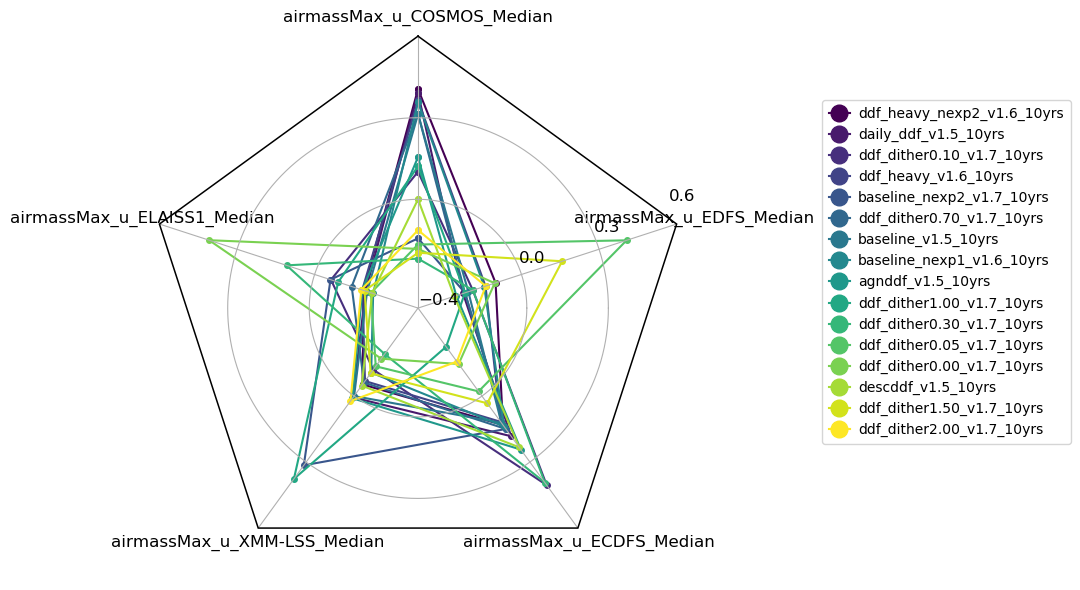

In [26]:
# best, worst 10
summary_df_normed_u = summary_df_normed_maxairmass.sort_values(
    'u_sum', ascending=False).loc[:, filt_cols['u'] + ['u_sum']]

# plot
radar(summary_df_normed_u.sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.4, 0, 0.3, 0.6], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.2.2 `g` band

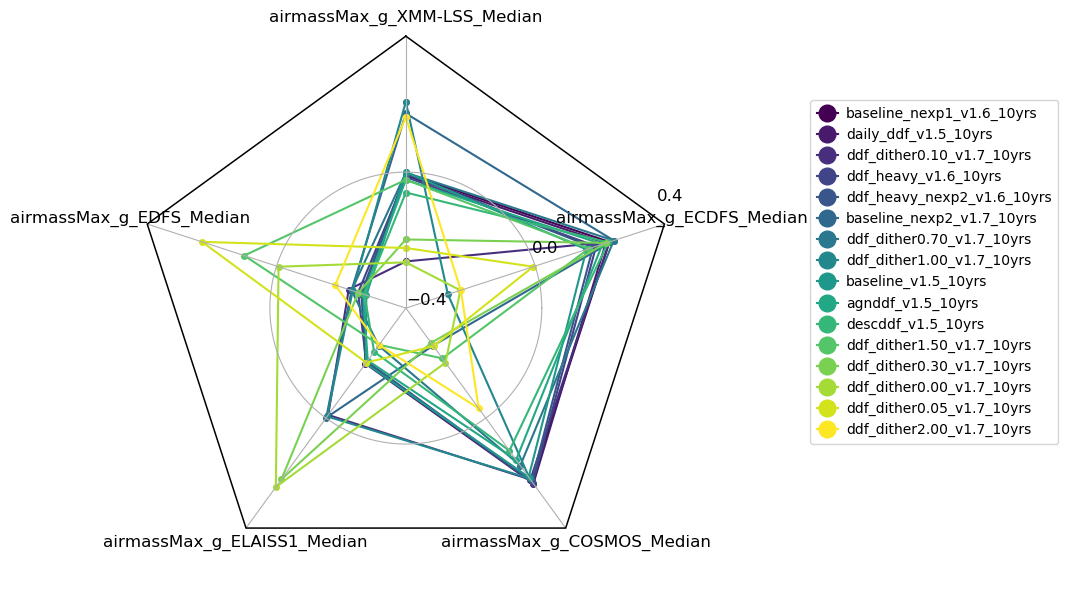

In [30]:
# best, worst 10
summary_df_normed_g = summary_df_normed_maxairmass.sort_values(
    'g_sum', ascending=False).loc[:, filt_cols['g'] + ['g_sum']]

# plot
radar(summary_df_normed_g.sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.4, 0, 0.4], cmap='viridis', alpha=0.8)
plt.tight_layout()

<a id='nvisit'><a>
#### 2.3 Number of visits
__!!__ All metric values will be normalized to the result of the `XMM-LSS` field from comparision

In [31]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'nvisit' in key[1]]
KeyNames

['nvisit_u_COSMOS',
 'nvisit_g_XMM-LSS',
 'nvisit_z_COSMOS',
 'nvisit_z_XMM-LSS',
 'nvisit_i_ECDFS',
 'nvisit_r_XMM-LSS',
 'nvisit_r_COSMOS',
 'nvisit_r_EDFS',
 'nvisit_r_ELAISS1',
 'nvisit_g_EDFS',
 'nvisit_z_EDFS',
 'nvisit_u_ELAISS1',
 'nvisit_u_XMM-LSS',
 'nvisit_u_ECDFS',
 'nvisit_g_ELAISS1',
 'nvisit_y_XMM-LSS',
 'nvisit_g_COSMOS',
 'nvisit_z_ELAISS1',
 'nvisit_g_ECDFS',
 'nvisit_z_ECDFS',
 'nvisit_i_COSMOS',
 'nvisit_y_ELAISS1',
 'nvisit_y_EDFS',
 'nvisit_r_ECDFS',
 'nvisit_i_ELAISS1',
 'nvisit_y_COSMOS',
 'nvisit_y_ECDFS',
 'nvisit_i_EDFS',
 'nvisit_i_XMM-LSS',
 'nvisit_u_EDFS']

In [32]:
# get summary for the above keynames and normalize by the specified run
norm_run = 'baseline_v1.5_10yrs'
summary_df_normed_nvisit = getNormSummaryMedian(final_resultDbs, norm_run, 
                                                KeyNames, ['u', 'g'], norm_func=np.divide)

# get specific ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

# compile filter cols
filt_cols = {}
for filt in 'ugrizy':
    filt_cols[filt] = [col for col in summary_df_normed_nvisit.columns if f'_{filt}_' in col]

#### 2.3.1 `u` band

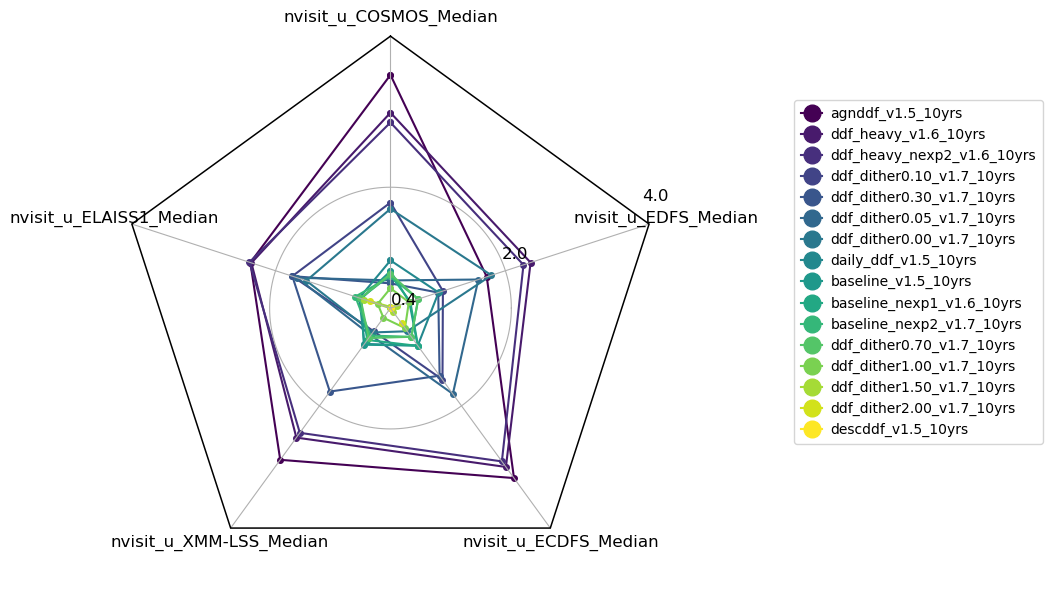

In [35]:
# best, worst 10
summary_df_normed_u = summary_df_normed_nvisit.sort_values(
    'u_sum', ascending=False).loc[:, filt_cols['u'] + ['u_sum']]

# plot
radar(summary_df_normed_u.sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[.4, 2, 4], cmap='viridis', alpha=0.8)
plt.tight_layout()

##### __Zoom in__

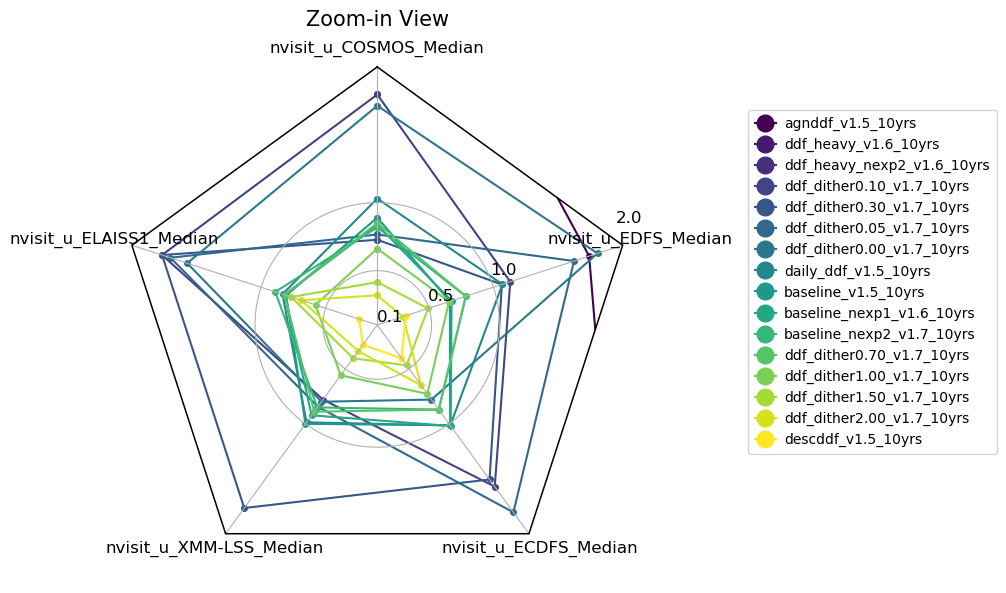

In [38]:
# plot
radar(summary_df_normed_u.sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[.1, .5, 1, 2], cmap='viridis', alpha=0.8)
_ = plt.title('Zoom-in View', fontsize=15)
plt.tight_layout()

#### 2.3.2 `g` band

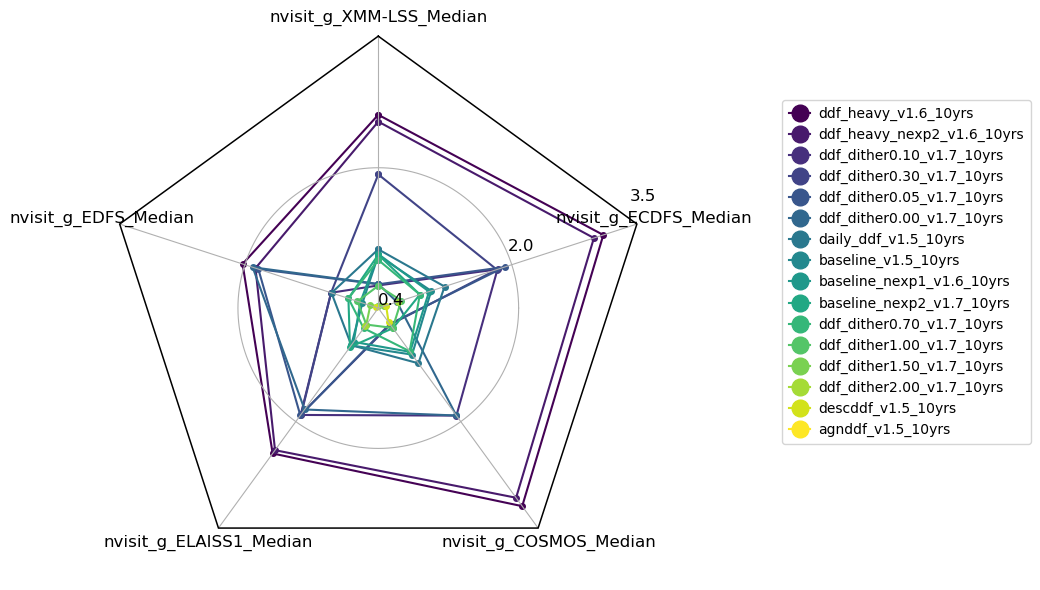

In [40]:
# best, worst 10
summary_df_normed_g = summary_df_normed_nvisit.sort_values(
    'g_sum', ascending=False).loc[:, filt_cols['g'] + ['g_sum']]

# plot
radar(summary_df_normed_g.sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[.4, 2, 3.5], cmap='viridis', alpha=0.8)
plt.tight_layout()

##### __Zoom in__

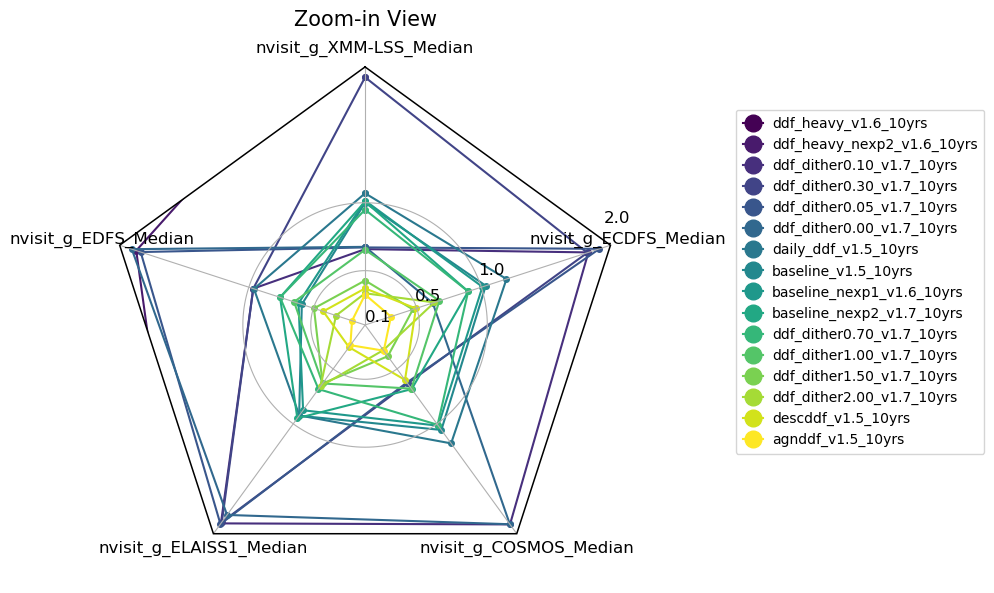

In [41]:
# plot
radar(summary_df_normed_g.sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[.1, .5, 1, 2], cmap='viridis', alpha=0.8)
_ = plt.title('Zoom-in View', fontsize=15)
plt.tight_layout()

<a id='coadd'><a>
#### 2.4 Coadd Depth

In [42]:
# print all metric names
KeyNames = [key[1] for key in bd_keys if 'coadd' in key[1]]
KeyNames

['coadd_u_COSMOS',
 'coadd_g_XMM-LSS',
 'coadd_z_COSMOS',
 'coadd_z_XMM-LSS',
 'coadd_i_ECDFS',
 'coadd_r_XMM-LSS',
 'coadd_r_COSMOS',
 'coadd_r_EDFS',
 'coadd_r_ELAISS1',
 'coadd_g_EDFS',
 'coadd_z_EDFS',
 'coadd_u_ELAISS1',
 'coadd_u_XMM-LSS',
 'coadd_u_ECDFS',
 'coadd_g_ELAISS1',
 'coadd_y_XMM-LSS',
 'coadd_g_COSMOS',
 'coadd_z_ELAISS1',
 'coadd_g_ECDFS',
 'coadd_z_ECDFS',
 'coadd_i_COSMOS',
 'coadd_y_ELAISS1',
 'coadd_y_EDFS',
 'coadd_r_ECDFS',
 'coadd_i_ELAISS1',
 'coadd_y_COSMOS',
 'coadd_y_ECDFS',
 'coadd_i_EDFS',
 'coadd_i_XMM-LSS',
 'coadd_u_EDFS']

In [43]:
# get summary for the above keynames and normalize by the specified run
norm_run = 'baseline_v1.5_10yrs'
summary_df_normed_coadd = getNormSummaryMedian(final_resultDbs, norm_run, 
                                               KeyNames, ['u', 'g', 'r', 'i', 'z', 'y'], 
                                               norm_func=np.subtract)

# get specific ddf runs
ddf_runs = [run for run in runs_list if 'ddf_' in run and 'noddf' not in run]

# compile filter cols
filt_cols = {}
for filt in 'ugrizy':
    filt_cols[filt] = [col for col in summary_df_normed_coadd.columns if f'_{filt}_' in col]

#### 2.4.1 `u` band

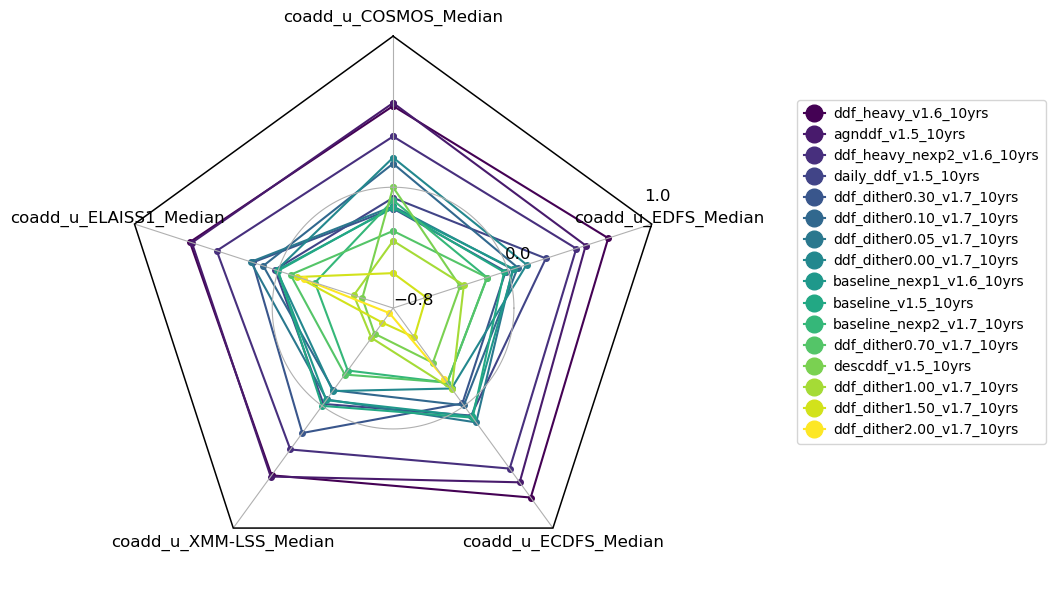

In [55]:
# best, worst
summary_df_normed_u = summary_df_normed_coadd.sort_values(
    'u_sum', ascending=False).loc[:, filt_cols['u'] + ['u_sum']]

# plot
radar(summary_df_normed_u.sort_values('u_sum', ascending=False).drop(columns=['u_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.4.2 `g` band

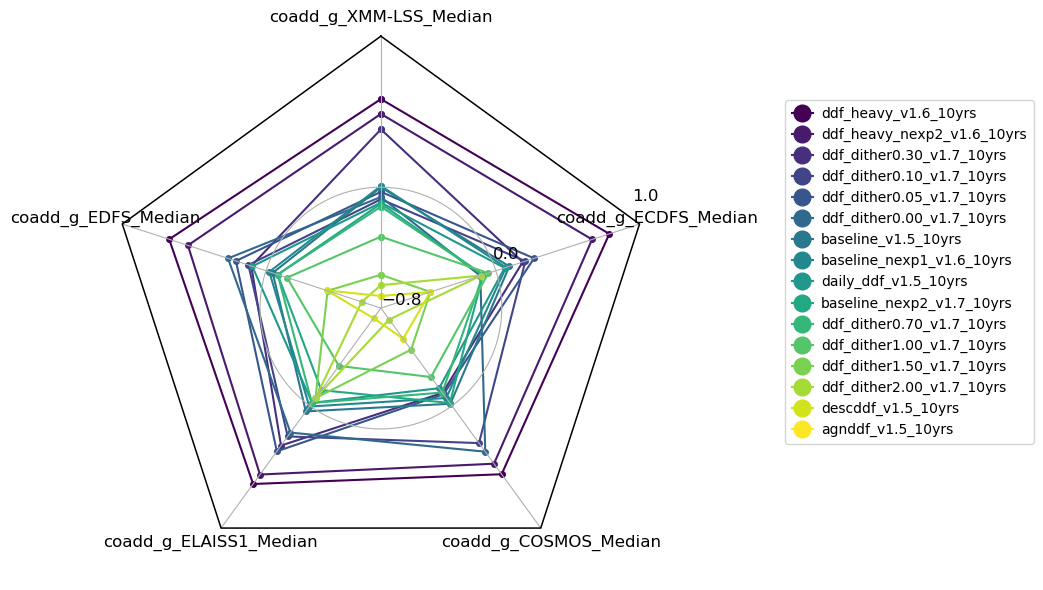

In [54]:
# best, worst
summary_df_normed_g = summary_df_normed_coadd.sort_values(
    'g_sum', ascending=False).loc[:, filt_cols['g'] + ['g_sum']]

# plot
radar(summary_df_normed_g.sort_values('g_sum', ascending=False).drop(columns=['g_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.4.3 `r` band

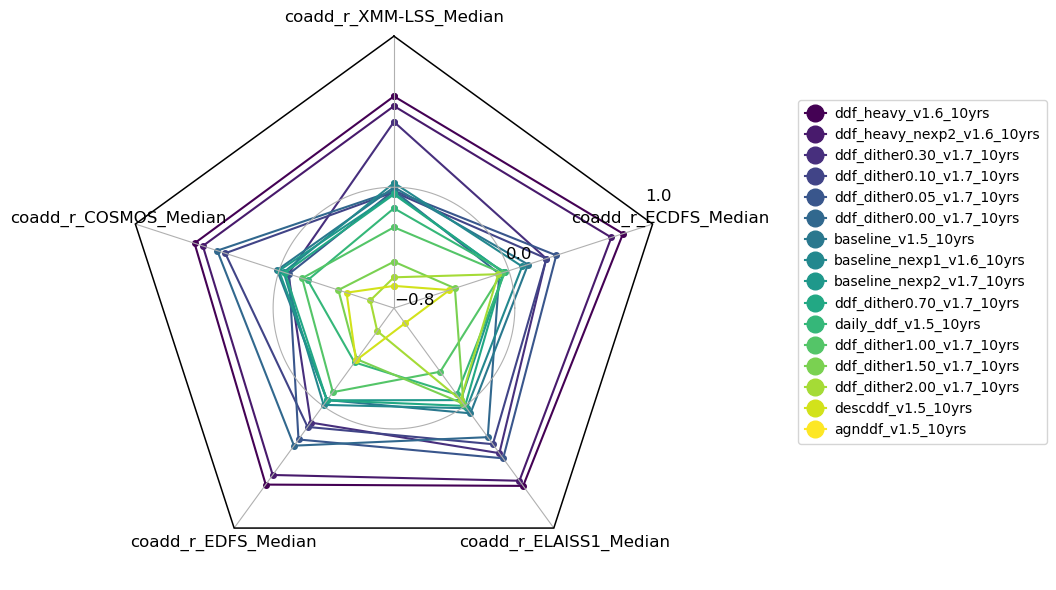

In [53]:
# best, worst
summary_df_normed_r = summary_df_normed_coadd.sort_values(
    'r_sum', ascending=False).loc[:, filt_cols['r'] + ['r_sum']]

# plot
radar(summary_df_normed_r.sort_values('r_sum', ascending=False).drop(columns=['r_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.4.4 `i` band

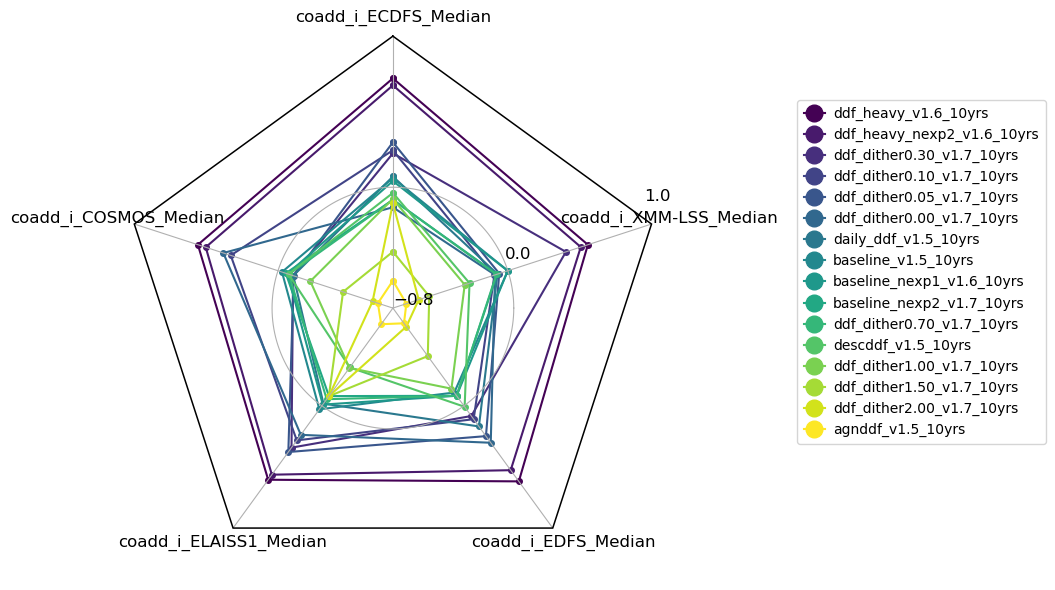

In [56]:
# best, worst
summary_df_normed_i = summary_df_normed_coadd.sort_values(
    'i_sum', ascending=False).loc[:, filt_cols['i'] + ['i_sum']]

# plot
radar(summary_df_normed_i.sort_values('i_sum', ascending=False).drop(columns=['i_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.4.5 `z` band

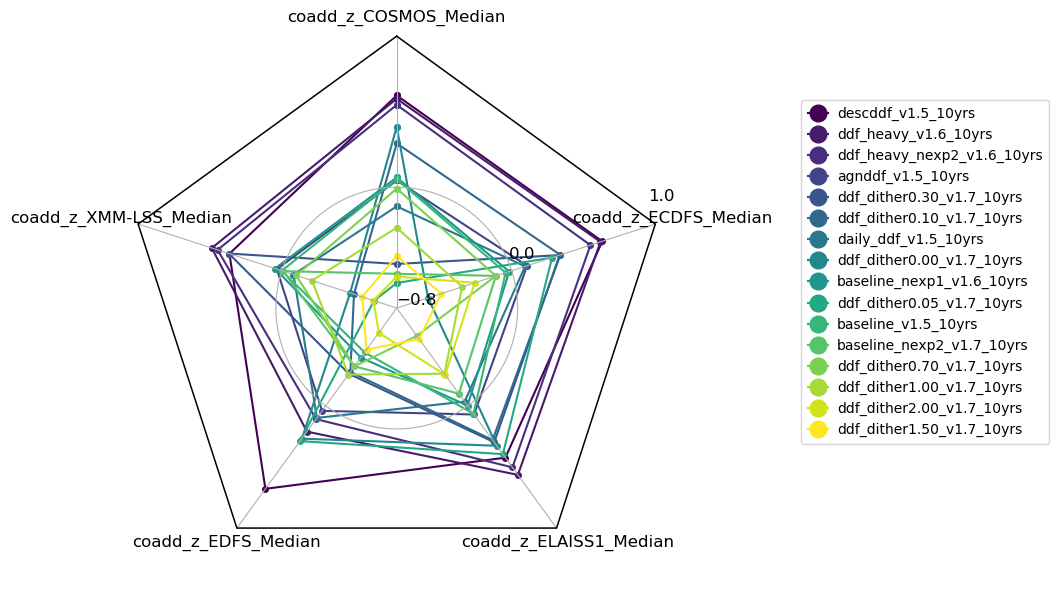

In [57]:
# best, worst
summary_df_normed_z = summary_df_normed_coadd.sort_values(
    'z_sum', ascending=False).loc[:, filt_cols['z'] + ['z_sum']]

# plot
radar(summary_df_normed_z.sort_values('z_sum', ascending=False).drop(columns=['z_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

#### 2.4.6 `y` band

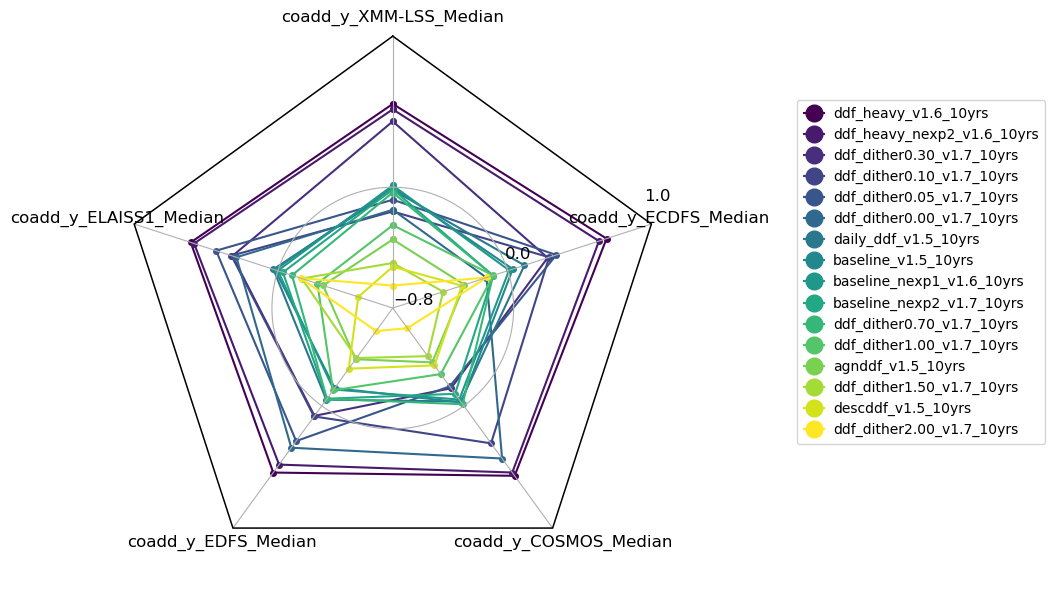

In [58]:
# best, worst
summary_df_normed_y = summary_df_normed_coadd.sort_values(
    'y_sum', ascending=False).loc[:, filt_cols['y'] + ['y_sum']]

# plot
radar(summary_df_normed_y.sort_values('y_sum', ascending=False).drop(columns=['y_sum']), 
      bbox_to_anchor=(1.7, 0.25), figsize=(15, 6), rgrids=[-.8, 0, 1], cmap='viridis', alpha=0.8)
plt.tight_layout()

## ------------- Stop -----------------

In [54]:
# # get summary names
# summaryNames = getSummaryStatNames(final_resultDbs['baseline_v1.5_10yrs'], 
#                                    KeyNames[0])[0]['StatNames']

# # loop through metric Keys and summaries -> combine into one pandas df
# summary_dfs = []
# for KeyName in KeyNames:
#     for summaryName in ['Median']:
#         summary_df = getSummary(
#             final_resultDbs, 
#             KeyName, 
#             summaryName)[['summaryValue', 'runName']].rename(columns={'summaryValue':
#                                                             f'{KeyName}_{summaryName}'})
#         summary_dfs.append(summary_df.set_index('runName'))

# summary_df_all = summary_dfs[0].join(summary_dfs[1:], 
#                                      how='outer').reset_index().rename(columns={'index': 'runName'})
# ` = summary_df_all.set_index('runName')

# # define normalizing run
# norm_run = 'baseline_v1.5_10yrs'
# norm_metric_u_m5Median = summary_df_all.loc[norm_run, 'm5Meidan_u_XMM-LSS_Median']
# norm_metric_g_m5Median = summary_df_all.loc[norm_run, 'm5Meidan_g_XMM-LSS_Median']
# norm_metric_r_m5Median = summary_df_all.loc[norm_run, 'm5Meidan_r_XMM-LSS_Median']

# u_cols = [col for col in summary_df_all.columns if '_u_' in col]
# g_cols = [col for col in summary_df_all.columns if '_g_' in col]
# r_cols = [col for col in summary_df_all.columns if '_r_' in col]

# summary_df_normed = summary_df_all.copy()
# summary_df_normed.loc[:, u_cols] = summary_df_normed.loc[:, u_cols] - norm_metric_u_m5Median
# summary_df_normed.loc[:, g_cols] = summary_df_normed.loc[:, g_cols] - norm_metric_g_m5Median
# summary_df_normed.loc[:, r_cols] = summary_df_normed.loc[:, r_cols] - norm_metric_r_m5Median

# # fillna
# summary_df_normed = summary_df_normed.fillna(0)

# # compute sum
# summary_df_normed.loc[:, 'u_sum'] = summary_df_normed.loc[:, u_cols].sum(axis=1)
# summary_df_normed.loc[:, 'g_sum'] = summary_df_normed.loc[:, g_cols].sum(axis=1)
# summary_df_normed.loc[:, 'r_sum'] = summary_df_normed.loc[:, r_cols].sum(axis=1)